In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Cleaning the first dataset : Name and description


In [4]:
#droping this columns 
data.drop(columns=['name', 'description'], inplace=True)

# Cleaning the attribute: Make


In [5]:
#missing values 
print(data['make'].isnull().sum())

#removing the extra whitespace 
data['make'] = data['make'].str.strip()

#Printing the unique values 
print(data['make'].unique())

0
['Jeep' 'GMC' 'Dodge' 'RAM' 'Nissan' 'Ford' 'Hyundai' 'Chevrolet'
 'Volkswagen' 'Chrysler' 'Kia' 'Mazda' 'Acura' 'Subaru' 'Audi' 'BMW'
 'Toyota' 'Buick' 'Mercedes-Benz' 'Honda' 'Lincoln' 'Cadillac' 'INFINITI'
 'Lexus' 'Land Rover' 'Volvo' 'Genesis' 'Jaguar']


# Cleaning the attribute: Model 

In [6]:
#removing extra space 
data['model']= data['model'].str.strip()

#print missing values 
print("Null value: ",data['model'].isnull().sum())
print("-------Before: ",data['model'].value_counts())

# Count frequency
model_counts = data['model'].value_counts()

# Identify rare models 
rare_models = model_counts[model_counts < 10].index

# Replace rare models with 'Other'
data['model'] = data['model'].apply(lambda x: 'Other' if x in rare_models else x)
print("----------After: ",data['model'].value_counts())

Null value:  0
-------Before:  model
Hornet                        65
3500                          52
Compass                       47
Durango                       41
CX-90 PHEV                    34
                              ..
CX-70                          1
C40 Recharge Pure Electric     1
Soul                           1
AMG C 43                       1
Forte                          1
Name: count, Length: 153, dtype: int64
----------After:  model
Other                 345
Hornet                 65
3500                   52
Compass                47
Durango                41
CX-90 PHEV             34
Tucson Hybrid          33
Grand Cherokee         29
Grand Cherokee 4xe     28
Grand Cherokee L       28
Silverado 1500         27
IONIQ 5                26
Sportage               26
Santa Cruz             24
Taos                   21
Wrangler 4xe           20
Wagoneer               16
2500                   15
Mustang Mach-E         15
Edge                   14
Kicks            

# Cleaning the attribute : year 

In [7]:
#checking for missing values 
print(data['year'].isnull().sum())

0


In [8]:
#verifying the data type 
print(data['year'].dtype)

int64


In [9]:
#checking for invalid values 
print(data['year'].describe())

count    1002.000000
mean     2023.916168
std         0.298109
min      2023.000000
25%      2024.000000
50%      2024.000000
75%      2024.000000
max      2025.000000
Name: year, dtype: float64


# Cleaning the attribute: price 

In [10]:
#verifying the data type 
print(data['price'].dtype)

float64


In [11]:
#checking for missing values 
print(data['price'].isnull().sum())

23


In [12]:
#before dropping 
print("Before dropping");
print(len(data))

#dropping the rows with no price 
data = data.dropna(subset=['price'])

#after 
print("After dropping");
print(len(data))

Before dropping
1002
After dropping
979


In [13]:
print(data['price'].describe())

count       979.000000
mean      50202.985700
std       18700.392062
min           0.000000
25%       36600.000000
50%       47165.000000
75%       58919.500000
max      195895.000000
Name: price, dtype: float64


In [14]:
#checking the price whose min=0
print("Number of prices <= 0:", (data['price'] <= 0).sum())

Number of prices <= 0: 1


In [15]:
data = data[data['price'] > 0]
print("New count after dropping prices <= 0:", len(data))

New count after dropping prices <= 0: 978


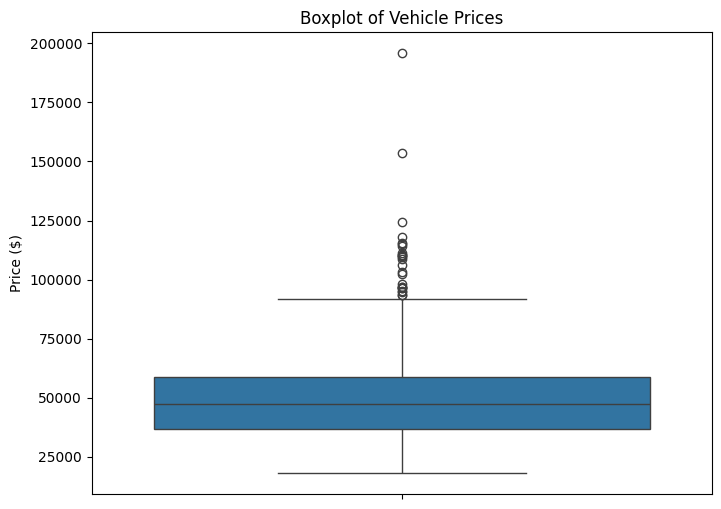

In [16]:
# visualize the outliear with boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(data['price'])
plt.title('Boxplot of Vehicle Prices')
plt.ylabel('Price ($)')
plt.show()

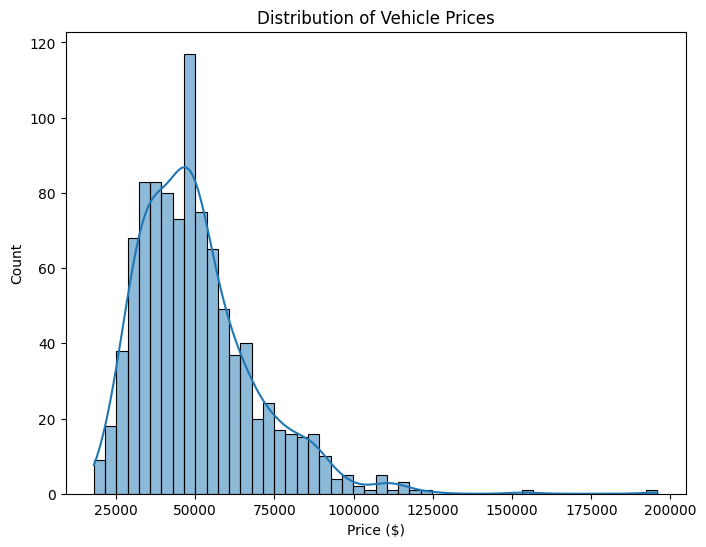

In [17]:
#  Visualize distribution with a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price ($)')
plt.show()

In [18]:
# Remove outliers (> $150,000)
data = data[data['price'] <= 150000]
print("Rows after removing prices > $150,000:", len(data))

Rows after removing prices > $150,000: 976


In [19]:
print(data['price'].describe())

count       976.000000
mean      49999.116803
std       17759.490947
min       17994.000000
25%       36600.000000
50%       47165.000000
75%       58868.500000
max      124250.000000
Name: price, dtype: float64


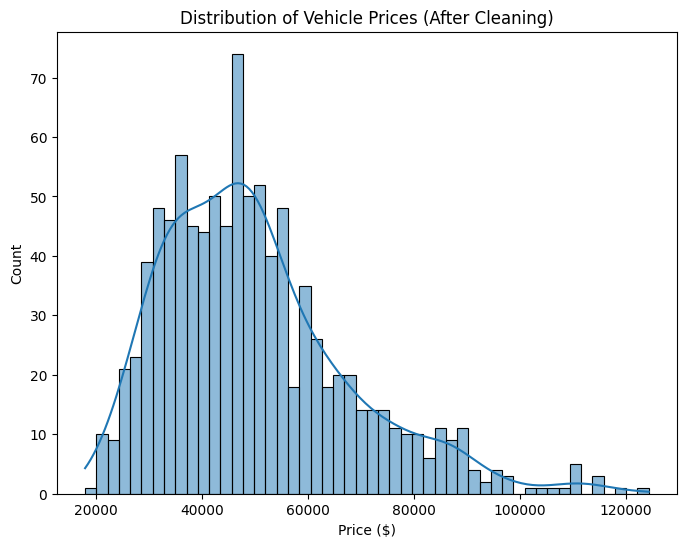

In [20]:
#to check the distribution 
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices (After Cleaning)')
plt.xlabel('Price ($)')
plt.show()

In [21]:
# Calculate skewness of price
print("Skewness of price:", data['price'].skew())

Skewness of price: 1.0300224827215616


In [22]:
# Creating log-transformed price column
data['log_price'] = np.log1p(data['price'])

In [23]:
#  Calculating skewness of log_price
print("Skewness of log_price:", data['log_price'].skew())

Skewness of log_price: 0.11317894089557765


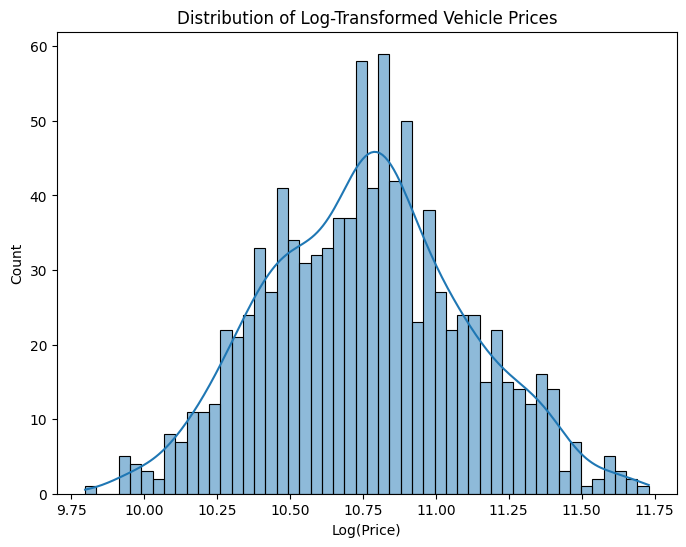

In [24]:
#seeing the skewness of the log_price 

plt.figure(figsize=(8, 6))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Vehicle Prices')
plt.xlabel('Log(Price)')
plt.show()

In [25]:
print(data['log_price'].describe())

count    976.000000
mean      10.760873
std        0.341691
min        9.797849
25%       10.507831
50%       10.761429
75%       10.983078
max       11.730059
Name: log_price, dtype: float64


In [26]:
#checking for any null values 
print("Number of NaN values in log_price:", data['log_price'].isna().sum())

Number of NaN values in log_price: 0


# Cleaning the attribute : Engine 

In [27]:
len(data)

976

In [28]:
data['engine'].describe()

count                    974
unique                    98
top       16V GDI DOHC Turbo
freq                     120
Name: engine, dtype: object

In [29]:
print("Null values:", data['engine'].isnull().sum())

Null values: 2


In [30]:
print("Unique engines:", data['engine'].nunique())

Unique engines: 98


In [31]:
#rows which has invalid patterns or html tags 
html_pattern = r'<dt>VIN</dt>'
html_rows = data['engine'].str.contains(html_pattern, case=False, na=False).sum()
print("Rows with HTML tags:", html_rows)

Rows with HTML tags: 8


In [32]:
print("Engines with HTML tags:\n", data[data['engine'].str.contains(html_pattern, case=False, na=False)]['engine'].head(8))


Engines with HTML tags:
 195    >\n\n    \n    <dt>VIN</dt>\n     ZACNDFAN0R3A...
255    dd>\n\n    \n    <dt>VIN</dt>\n     1V2BMPE85R...
474    >\n\n    \n    <dt>VIN</dt>\n     ZACNDFAN0R3A...
610                 <dt>VIN</dt>\n     3GN7DNRPXRS232327
685                 <dt>VIN</dt>\n     1FMUK7HH1SGA05728
705                 <dt>VIN</dt>\n     3C63R3HLXRG198198
726    d>\n\n    \n    <dt>VIN</dt>\n     SADHM2S12R1...
893    d>\n\n    \n    <dt>VIN</dt>\n     7FARS4H71SE...
Name: engine, dtype: object


In [33]:
print(data['engine'].value_counts())

engine
16V GDI DOHC Turbo                                           120
16V GDI DOHC Turbo Hybrid                                     92
c                                                             91
24V MPFI DOHC                                                 53
16V MPFI OHV                                                  46
                                                            ... 
16V MPFI DOHC Hybrid                                           1
o                                                              1
4L V-8 VVT variable valve control, regular unleaded, engi      1
DOHC, D-CVVT variable valve control, regular unleaded, en      1
8 gasoline direct injection, variable valve control, regu      1
Name: count, Length: 98, dtype: int64


In [34]:
#to find the engine which has only 1 
Engine_count = data['engine'].value_counts()
Engine_count_one = Engine_count[Engine_count ==1]
Engine_count_one

engine
4 gasoline direct injection, DOHC, CVVT variable valve co    1
ream 2.5L I-4 port/direct injection, DOHC, CVVT variable     1
8 variable valve control, regular unleaded, engine with 4    1
ne 3L I-6 gasoline direct injection, DOHC, variable valve    1
oled Turbo Premium Unleaded I-4 2.0 L/122                    1
6.6L V-8 diesel direct injection, intercooled turbo, die     1
;                                                            1
dd>\n\n    \n    <dt>VIN</dt>\n     1V2BMPE85RC003636        1
16V PDI DOHC Turbo Hybrid                                    1
24V MPFI DOHC Hybrid                                         1
1.3L I-3 gasoline direct injection, DOHC, variable valve     1
6 gasoline direct injection, i-VTEC variable valve contro    1
6 DOHC, VVT variable valve control, engine with cylinder     1
32V GDI DOHC Twin Turbo                                      1
24V DOHC                                                     1
<dt>VIN</dt>\n     3GN7DNRPXRS232327            

In [35]:
#replacing the one count engine to others 
data['engine']=data['engine'].apply(lambda x : 'other' if x in Engine_count_one else x)

In [36]:
data['engine'].value_counts()

engine
16V GDI DOHC Turbo                                           120
16V GDI DOHC Turbo Hybrid                                     92
c                                                             91
24V MPFI DOHC                                                 53
16V MPFI OHV                                                  46
                                                            ... 
6 gasoline direct injection, variable valve control, regu      2
4 port/direct injection, DOHC, variable valve control, in      2
.6L I-4 gasoline direct injection, DOHC, D-CVVT variable       2
Unleaded V-8 5.6 L/339                                         2
ar 3.6L V-6 DOHC, VVT variable valve control, regular unl      2
Name: count, Length: 63, dtype: int64

In [37]:
#replacing the html of the code into others 
html_rows_values=data[data['engine'].str.contains(html_pattern, case=False, na=False)]['engine']
html_rows_values
data['engine']=data['engine'].apply(lambda x : 'other' if x in html_rows_values else x)

In [38]:
data['engine'].describe()

count                    974
unique                    63
top       16V GDI DOHC Turbo
freq                     120
Name: engine, dtype: object

In [39]:
# checking how many others are present 
string_other = r'other'
other_rows = data[data['engine'].str.contains(string_other , case=False , na=False)]['engine']
other_rows.value_counts()

engine
other    36
Name: count, dtype: int64

In [40]:
print(data['engine'].unique())

['24V GDI DOHC Twin Turbo' 'OHV'
 '6.2L V-8 gasoline direct injection, variable valve contr' '16V MPFI OHV'
 '24V DDI OHV Turbo Diesel' '24V MPFI DOHC' '32V DDI OHV Turbo Diesel'
 '16V GDI DOHC Turbo Hybrid'
 'ar 3.6L V-6 DOHC, variable valve control, regular unleade'
 '16V GDI DOHC Turbo' 'oled Turbo Diesel I-6 6.7 L/408'
 '16V PDI DOHC Turbo' 'c'
 '4 gasoline direct injection, DOHC, variable valve control'
 '16V PDI DOHC' 'DOHC' '24V PDI DOHC Flexible Fuel' '16V GDI OHV'
 '16V MPFI DOHC' '24V GDI DOHC'
 'gasoline direct injection, DOHC, intercooled turbo, premi'
 '16V GDI DOHC Hybrid' '24V GDI SOHC'
 'gasoline direct injection, DOHC, variable valve control,' 'c Motor'
 '4 gasoline direct injection, DOHC, Multiair variable valv' 'other'
 '24V PDI DOHC Twin Turbo' '24V GDI DOHC Turbo'
 'MAX 3.4L V-6 port/direct injection, DOHC, variable valve'
 '4 DOHC, CVTCS variable valve control, regular unleaded, e'
 '12V GDI DOHC Turbo'
 'o 1.5L I-3 gasoline direct injection, DOHC, CVTCS variabl'


In [41]:
#extracting the displacement from the set
import re
def extract_displacement(engine):
    match = re.search(r'(\d\.\d)[lL]', str(engine))
    if match:
        return float(match.group(1))
    return None

data['engine_displacement'] = data['engine'].apply(extract_displacement)

In [42]:
print(data['engine_displacement'].value_counts())
print("Total number of rows: ", data.shape)

engine_displacement
3.6    26
6.7    14
2.5    12
1.5    10
1.6     5
3.4     4
5.6     3
5.3     3
6.2     2
Name: count, dtype: int64
Total number of rows:  (976, 17)


In [43]:
#as they have only few int values and rest are Null 
data.drop(columns=['engine_displacement'], inplace=True)

In [44]:
# now to look for the valve type 
def extract_valve_type(engine):
    engine = str(engine).lower()

    # Check for common valve types (in order of priority)
    if 'dohc' in engine:
        return 'DOHC'
    elif 'sohc' in engine:
        return 'SOHC'
    elif 'ti-vct' in engine:
        return 'Ti-VCT'
    elif 'cvvt' in engine:
        return 'CVVT'
    elif 'vvt' in engine:
        return 'VVT'
    else:
        return 'Unknown'

data['valve_type'] = data['engine'].apply(extract_valve_type)
print(data['valve_type'].value_counts())
print("total rows:",len(data))

valve_type
DOHC       658
Unknown    285
VVT         17
SOHC        16
Name: count, dtype: int64
total rows: 976


In [45]:
#simplying it more , to have a major + unknown + other 
def simplify_valve_type(val):
    if val == 'DOHC':
        return 'DOHC'
    elif val == 'Unknown':
        return 'Unknown'
    else:
        return 'Other'

data['valve_type_simplified'] = data['valve_type'].apply(simplify_valve_type)



In [46]:
data['valve_type'].describe()

count      976
unique       4
top       DOHC
freq       658
Name: valve_type, dtype: object

In [47]:
#dropping the comlmn engine 
data.drop(columns=['engine'], inplace=True)

In [48]:
data.drop(columns=['valve_type'], inplace=True)

In [49]:
data.head()

,make,model,year,price,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,log_price,valve_type_simplified
0,Jeep,Wagoneer,2024,74600.0,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,11.219909,DOHC
1,Jeep,Grand Cherokee,2024,50170.0,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,10.823192,Unknown
2,GMC,Other,2024,96410.0,8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,11.476376,Unknown
3,Dodge,Durango,2023,46835.0,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,10.754407,Unknown
4,RAM,3500,2024,81663.0,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,11.310369,Unknown


# Cleaning the attribute : Cylinders

In [50]:
#null values 
data['cylinders'].isnull().sum()

np.int64(100)

In [51]:
#values stored in unique values 
data['cylinders'].value_counts(dropna=False)

cylinders
4.0    489
6.0    271
NaN    100
8.0     87
3.0     27
0.0      2
Name: count, dtype: int64

In [52]:
#filling the null values to 0.0 
data['cylinders'] = data['cylinders'].replace(0.0, np.nan)

# Cleaning attribute: Fuel

In [53]:
data['fuel'].isnull().sum()

np.int64(7)

In [54]:
data['fuel'].value_counts()

fuel
Gasoline                646
Hybrid                  135
Electric                 94
Diesel                   72
PHEV Hybrid Fuel         16
E85 Flex Fuel             5
Diesel (B20 capable)      1
Name: count, dtype: int64

In [55]:
#mapping the varaibles to the associated values 
fuel_map = {
    'Gasoline': 'Gasoline',
    'Hybrid': 'Hybrid',
    'PHEV Hybrid Fuel': 'Hybrid',
    'Electric': 'Electric',
    'Diesel': 'Diesel',
    'Diesel (B20 capable)': 'Diesel',
    'E85 Flex Fuel': 'Gasoline'
}

data['fuel'] = data['fuel'].map(fuel_map)


In [56]:
#verifying it 
data['fuel'].value_counts()

fuel
Gasoline    651
Hybrid      151
Electric     94
Diesel       73
Name: count, dtype: int64

In [57]:
#now changing the cylinder according to the vehical 

#Recalculate mode
cylinder_mode = data['cylinders'].mode()[0]

# Smart imputation function
def impute_cylinders(row):
    if pd.isna(row['cylinders']):
        if row['fuel'] == 'Electric':
            return 0.0
        else:
            return cylinder_mode  # Default (probably 4.0)
    return row['cylinders']

# Apply to dataset
data['cylinders'] = data.apply(impute_cylinders, axis=1)


In [58]:
#to check the cylinder per fuel
print(data['cylinders'].value_counts())
print("Missing cylinders:", data['cylinders'].isnull().sum())


cylinders
4.0    497
6.0    271
0.0     94
8.0     87
3.0     27
Name: count, dtype: int64
Missing cylinders: 0


In [59]:
pd.crosstab(data['fuel'], data['cylinders'])


cylinders,0.0,3.0,4.0,6.0,8.0
fuel,,,,,
Diesel,0,0,8,58,7
Electric,94,0,0,0,0
Gasoline,0,27,337,207,80
Hybrid,0,0,145,6,0


# Cleaning the attribute : Mileage 

In [60]:
#getting the sampple 
data['mileage'].sample(10, random_state=42)

201     6.0
555    10.0
176    12.0
478     5.0
66      7.0
504     5.0
908     6.0
613     5.0
912    11.0
160     5.0
Name: mileage, dtype: float64

In [61]:
#converting the milaeage into thousands 
data['mileage'] = data['mileage'] * 1000

In [62]:
data.head(10)

,make,model,year,price,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain,log_price,valve_type_simplified
0,Jeep,Wagoneer,2024,74600.0,6.0,Gasoline,10000.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,11.219909,DOHC
1,Jeep,Grand Cherokee,2024,50170.0,6.0,Gasoline,1000.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,10.823192,Unknown
2,GMC,Other,2024,96410.0,8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,11.476376,Unknown
3,Dodge,Durango,2023,46835.0,8.0,Gasoline,32000.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,10.754407,Unknown
4,RAM,3500,2024,81663.0,6.0,Diesel,10000.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,11.310369,Unknown
5,Nissan,Other,2024,46000.0,6.0,Gasoline,3838000.0,Automatic CVT,Platinum,SUV,4.0,White,Gray,All-wheel Drive,10.736418,DOHC
6,Jeep,Wagoneer,2024,63862.0,6.0,Gasoline,5000.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive,11.064495,DOHC
7,Ford,Other,2024,89978.0,8.0,Diesel,15000.0,10-Speed Automatic,Lariat Super Duty,Pickup Truck,4.0,Carbonized Gray Metallic,Black Onyx,Four-wheel Drive,11.407332,Unknown
8,Hyundai,Tucson Hybrid,2024,42230.0,4.0,Hybrid,5000.0,6-Speed Automatic,Limited,SUV,4.0,White Pearl,Black,All-wheel Drive,10.650910,DOHC
9,Jeep,Grand Cherokee,2024,42773.0,6.0,Gasoline,20000.0,Automatic,Altitude,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive,10.663686,DOHC


In [63]:
data['mileage'].describe()

count    9.420000e+02
mean     6.753715e+04
std      5.116420e+05
min      0.000000e+00
25%      4.000000e+03
50%      8.000000e+03
75%      1.300000e+04
max      9.711000e+06
Name: mileage, dtype: float64

In [64]:
data['mileage'].isnull().sum()

np.int64(34)

In [65]:
#checking the top values in mileage 
data['mileage'].sort_values(ascending=False).head(10)

371    9711000.0
793    5581000.0
802    4723000.0
829    4501000.0
280    4440000.0
67     4357000.0
5      3838000.0
682    3425000.0
670    2500000.0
692    2077000.0
Name: mileage, dtype: float64

In [66]:
#replacing the outlier with median 
data.loc[data['mileage'] > 200000, 'mileage'] = data['mileage'].median()

In [67]:
#replacing the min with median 
data.loc[data['mileage'] == 0, 'mileage'] = data['mileage'].median()

In [68]:
data['mileage'].describe()

count       942.000000
mean      12910.828025
std       20655.992884
min        1000.000000
25%        5000.000000
50%        8000.000000
75%       12000.000000
max      197000.000000
Name: mileage, dtype: float64

In [69]:
#filling the missing values with median 
mileage_median = data['mileage'].median()
data['mileage'] = data['mileage'].fillna(mileage_median)

In [70]:
data['mileage'].isnull().sum()

np.int64(0)

In [71]:
data['mileage'].value_counts()

mileage
8000.0      194
5000.0      113
10000.0     102
1000.0       58
6000.0       50
           ... 
129000.0      1
85000.0       1
66000.0       1
41000.0       1
141000.0      1
Name: count, Length: 66, dtype: int64

# Cleaning the attribute : Transmisson


In [72]:
data['transmission'].isnull().sum()

np.int64(2)

In [73]:
data['transmission'].value_counts()

transmission
8-Speed Automatic                              312
Automatic                                      232
6-Speed Automatic                               95
1-Speed Automatic                               67
9-Speed Automatic                               59
10-Speed Automatic                              58
Automatic CVT                                   45
8-Speed Automatic with Auto-Shift               16
7-Speed DSGA? Automatic w/ 4MO                  11
8-Speed Automatic with Tiptronic                10
CVT                                              9
6-Spd Aisin F21-250 PHEV Auto Trans              7
8-speed automatic                                5
7-Speed DSG Automatic with Tiptronic             4
6-Speed Automatic Electronic with Overdrive      4
9-Speed 948TE Automatic                          4
8-Speed A/T                                      4
7-Speed Automatic with Auto-Shift                4
7-Speed Automatic S tronic                       4
Variable          

In [74]:
#making a seperate to minimise the names 
def extract_trans_type(text):
    text = str(text).lower()
    if 'cvt' in text:
        return 'CVT'
    elif 'manual' in text:
        return 'Manual'
    elif 'automatic' in text or 'auto' in text or 'a/t' in text:
        return 'Automatic'
    else:
        return 'Other'

data['transmission_type'] = data['transmission'].apply(extract_trans_type)


In [75]:
data['transmission_type'].value_counts()

transmission_type
Automatic    911
CVT           58
Other          7
Name: count, dtype: int64

In [76]:
#taking out speed from each type 
def extract_trans_speed(text):
    match = re.search(r'(\d+)[- ]*speed', str(text).lower())
    if match:
        return int(match.group(1))
    else:
        return np.nan  # Missing or unstructured

data['transmission_speed'] = data['transmission'].apply(extract_trans_speed)


In [77]:
data['transmission_speed'].value_counts()

transmission_speed
8.0     350
6.0     104
1.0      68
9.0      65
10.0     60
7.0      23
Name: count, dtype: int64

In [78]:
#to change the Null values 
speed_median = data['transmission_speed'].median()
data['transmission_speed'] = data['transmission_speed'].fillna(speed_median)


In [79]:
pd.crosstab(data['transmission_type'], data['transmission_speed'])

transmission_speed,1.0,6.0,7.0,8.0,9.0,10.0
transmission_type,,,,,,
Automatic,67,104,23,592,65,60
CVT,1,0,0,57,0,0
Other,0,0,0,7,0,0


In [80]:
data['transmission'].describe()

count                   974
unique                   38
top       8-Speed Automatic
freq                    312
Name: transmission, dtype: object

In [81]:
data[data['transmission'].str.lower().str.contains('manual', na=False)]['transmission'].value_counts()


Series([], Name: count, dtype: int64)

In [82]:
data[data['transmission'].str.lower().str.contains('dct|dual clutch|paddle|tiptronic', na=False)]['transmission'].value_counts()


transmission
8-Speed Automatic with Tiptronic        10
7-Speed DSG Automatic with Tiptronic     4
automatic w/paddle shifters              1
6-Speed DCT Automatic                    1
8 Speed Dual Clutch                      1
Name: count, dtype: int64

In [83]:
#dropping the table as not for manual 
data.drop(columns=['transmission'], inplace=True)


# Cleaning the attribute: Body

In [84]:
print("Null values:",data['body'].isnull().sum())
print("value count:",data['body'].value_counts())

Null values: 3
value count: body
SUV              689
Pickup Truck     151
Sedan             72
Cargo Van         36
Passenger Van     13
Hatchback         10
Convertible        1
Minivan            1
Name: count, dtype: int64


In [85]:
#to deal with value very less 
body_counts = data['body'].value_counts()
rare_bodies = body_counts[body_counts <= 5].index
data['body'] = data['body'].apply(lambda x: 'Other' if x in rare_bodies else x)


In [86]:
#replacing the nan values with mode 
data['body'] = data['body'].fillna('SUV')


In [87]:
print(data['body'].value_counts())
print("Missing:", data['body'].isnull().sum())


body
SUV              692
Pickup Truck     151
Sedan             72
Cargo Van         36
Passenger Van     13
Hatchback         10
Other              2
Name: count, dtype: int64
Missing: 0


# Cleaning the attribite: trim

In [88]:
print("NUll values: ", data['trim'].isnull().sum())
print("BODY:", data['trim'].value_counts())

NUll values:  1
BODY: trim
Limited                                 68
Base                                    56
Pursuit                                 33
SEL                                     33
Latitude                                29
                                        ..
Luxury FWD                               1
Tradesman Regular Cab 4x4 8&#39; Box     1
Twin Ultimate                            1
LXS                                      1
SV Intelligent AWD                       1
Name: count, Length: 195, dtype: int64


In [89]:
import html
data['trim'] = data['trim'].apply(lambda x: html.unescape(str(x)).strip())


In [90]:
#replacing less frequency ones to other 
trim_counts = data['trim'].value_counts()
rare_trims = trim_counts[trim_counts <= 5].index
data['trim'] = data['trim'].apply(lambda x: 'Other' if x in rare_trims else x)

In [91]:
#fixing null values 
data['trim'] = data['trim'].fillna('Limited')

In [92]:
#check
print(data['trim'].value_counts())

trim
Other                   298
Limited                  68
Base                     56
Pursuit                  33
SEL                      33
Latitude                 29
Premium                  28
Tradesman                25
Laredo                   18
1.5T SE                  17
GT                       17
R/T Plus                 15
Series II                15
R/T                      14
SEL Convenience          14
SV                       14
Laramie                  13
LT                       13
Sport                    13
S                        12
Trailhawk                12
Rubicon                  12
SE                       11
Big Horn                 11
GT AWD                   11
XLT                      11
EX                       10
SR                       10
High Roof                10
Base 4MATIC               9
Altitude                  9
SXT                       9
Blue                      8
Denali                    8
2.5T XRT                  8
Premium Plus   

In [93]:
#checking the importance of trim 
trim_price_impact = data.groupby('trim')['log_price'].mean().sort_values(ascending=False)
print(trim_price_impact)

trim
Base 4MATIC             11.418543
Series II               11.309402
Laramie                 11.308340
Big Horn                11.169228
Denali                  11.158609
Tradesman               11.052584
Premium Plus            11.051219
Rubicon                 11.030531
Base                    11.012559
High Roof               10.959419
Luxury                  10.915565
Platinum                10.894869
Premium                 10.876969
Trailhawk               10.869174
Hornet R/T Plus Eawd    10.819588
Other                   10.813123
XLT                     10.789226
LT                      10.786148
R/T Plus                10.766907
Pursuit                 10.757962
Limited                 10.750204
Altitude                10.748755
Preferred               10.716086
R/T                     10.712562
Laredo                  10.709435
Wind                    10.655997
SE                      10.629582
SEL                     10.612005
Sport                   10.605130
GT       

# Cleaning the attribute : door

In [94]:
print("Missing:", data['doors'].isnull().sum())
print(data['doors'].value_counts(dropna=False))

Missing: 7
doors
4.0    922
3.0     37
2.0      9
NaN      7
5.0      1
Name: count, dtype: int64


In [95]:
#for 5 convert to 4 only one value 
data['doors'] = data['doors'].replace(5.0, 4.0)

# Fill missing with most frequent (mode = 4)
data['doors'] = data['doors'].fillna(4.0)

In [96]:
print("Missing:", data['doors'].isnull().sum())
print(data['doors'].value_counts(dropna=False))

Missing: 0
doors
4.0    930
3.0     37
2.0      9
Name: count, dtype: int64


# Cleaning attribute : exterior_color

In [97]:
print("Missing:", data['exterior_color'].isnull().sum())
print(data['exterior_color'].value_counts(dropna=False))

Missing: 5
exterior_color
Bright White Clearcoat      80
Black                       31
White                       29
Diamond Black               25
Summit White                25
                            ..
41w                          1
Pure Red                     1
Onyx Black Metallic          1
Destroyer Gray Clearcoat     1
Wheatland Yellow             1
Name: count, Length: 261, dtype: int64


In [98]:
# Define color keyword mapping
color_map = {
    'black': 'Black',
    'white': 'White',
    'gray': 'Gray',
    'silver': 'Silver',
    'red': 'Red',
    'blue': 'Blue',
    'green': 'Green',
    'yellow': 'Yellow',
    'brown': 'Brown',
    'beige': 'Beige',
    'orange': 'Orange',
    'gold': 'Gold',
    'purple': 'Purple'
}

# Convert to lowercase and clean spaces
data['exterior_color'] = data['exterior_color'].str.lower().str.strip()

# Map base colors or assign 'Other'
def simplify_color(val):
    for key in color_map:
        if key in val:
            return color_map[key]
    return 'Other'

data['exterior_color'] = data['exterior_color'].fillna('Other').apply(simplify_color)

In [99]:
# Final check
print(data['exterior_color'].value_counts())
print("Missing:", data['exterior_color'].isnull().sum())

exterior_color
White     272
Black     180
Other     177
Gray      120
Blue       72
Silver     67
Red        52
Green      17
Gold       15
Orange      3
Yellow      1
Name: count, dtype: int64
Missing: 0


In [100]:
# Combine low-frequency colors into 'Other'
low_freq_colors = ['Orange', 'Yellow', 'Gold', 'Green'] 

data['exterior_color'] = data['exterior_color'].apply(lambda x: 'Other' if x in low_freq_colors else x)

# Final check
print(data['exterior_color'].value_counts())

exterior_color
White     272
Other     213
Black     180
Gray      120
Blue       72
Silver     67
Red        52
Name: count, dtype: int64


# Cleaning the attribute: interior_color

In [101]:
print("Missing:", data['interior_color'].isnull().sum())
print(data['interior_color'].value_counts(dropna=False))

Missing: 37
interior_color
Black           495
Global Black     83
Gray             76
Jet Black        45
Ebony            38
               ... 
Java              1
gray              1
Dark Palazzo      1
Gray/Black        1
Navy Pier         1
Name: count, Length: 90, dtype: int64


In [102]:
# Standard color mapping
interior_color_map = {
    'black': 'Black',
    'jet black': 'Black',
    'global black': 'Black',
    'ebony': 'Black',
    'gray': 'Gray',
    'grey': 'Gray',
    'ash': 'Gray',
    'dark palazzo': 'Gray',
    'tan': 'Beige',
    'beige': 'Beige',
    'brown': 'Brown',
    'java': 'Brown',
    'red': 'Red',
    'white': 'White',
    'blue': 'Blue',
    'navy': 'Blue',
    'green': 'Green'
}

def simplify_interior(val):
    val = str(val).lower().strip()
    for key in interior_color_map:
        if key in val:
            return interior_color_map[key]
    return 'Other'

data['interior_color'] = data['interior_color'].apply(simplify_interior)
data['interior_color'] = data['interior_color'].fillna('Other')
print(data['interior_color'].value_counts())

interior_color
Black    731
Other    115
Gray     100
Brown      8
Red        8
Beige      7
White      3
Blue       3
Green      1
Name: count, dtype: int64


In [103]:
# Rare color list
rare_colors = ['Brown', 'Red', 'Beige', 'White', 'Blue', 'Green']
data['interior_color'] = data['interior_color'].apply(lambda x: 'Other' if x in rare_colors else x)
print(data['interior_color'].value_counts())

interior_color
Black    731
Other    145
Gray     100
Name: count, dtype: int64


In [104]:
data['color_combo'] = data['exterior_color'] + '_Interior_' + data['interior_color']

# Preview
print(data['color_combo'].value_counts().head(10))

color_combo
White_Interior_Black     194
Other_Interior_Black     155
Black_Interior_Black     147
Gray_Interior_Black       86
Silver_Interior_Black     56
Blue_Interior_Black       53
White_Interior_Other      48
Red_Interior_Black        40
White_Interior_Gray       30
Other_Interior_Other      29
Name: count, dtype: int64


In [105]:
#as we have combined both 
data = data.drop(columns=['exterior_color', 'interior_color'])

In [106]:
# Rename the column
data = data.rename(columns={'color_combo': 'exterior_combo_interior'})

# Cleaning the attribute: drivetrain

In [107]:
print("Missing:", data['drivetrain'].isnull().sum())
print(data['drivetrain'].value_counts(dropna=False))

Missing: 0
drivetrain
All-wheel Drive      442
Four-wheel Drive     324
Front-wheel Drive    138
Rear-wheel Drive      72
Name: count, dtype: int64


In [108]:
#naming them better 
data['drivetrain'] = data['drivetrain'].replace({
    'All-wheel Drive': 'AWD',
    'Four-wheel Drive': '4WD',
    'Front-wheel Drive': 'FWD',
    'Rear-wheel Drive': 'RWD'
})


In [109]:
print(data['drivetrain'].value_counts(dropna=False))

drivetrain
AWD    442
4WD    324
FWD    138
RWD     72
Name: count, dtype: int64


In [110]:
data.head(1)

,make,model,year,price,cylinders,fuel,mileage,trim,body,doors,drivetrain,log_price,valve_type_simplified,transmission_type,transmission_speed,exterior_combo_interior
0,Jeep,Wagoneer,2024,74600.0,6.0,Gasoline,10000.0,Series II,SUV,4.0,4WD,11.219909,DOHC,Automatic,8.0,White_Interior_Black


# Encoding and Pipelining 

In [111]:
data = data.drop(columns=['price'])

In [112]:
data.to_csv("Cleaned_data.csv", index=False)

In [113]:
#TARGET AND FEATURES
X = data.drop(columns=['log_price'])  
y = data['log_price']               

In [114]:
#seperating the columns 
numerical_cols = ['year', 'cylinders', 'mileage', 'doors', 'transmission_speed']
categorical_cols = [
    'make', 'model', 'fuel', 'trim', 'body', 'drivetrain',
    'valve_type_simplified', 'transmission_type', 'exterior_combo_interior'
]

In [115]:
#CREATING THE PROCESSING PIPEPLINE 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [116]:
#Combine Preprocessing into a Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Applying Base Regression (LinearRegression)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [118]:
#split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
#add linear regression to pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [120]:
#train the model 
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [121]:
#Evauluate the model 
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8914176466099283
RMSE: 0.11360172250966617


# Apply Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # alpha is the regularization strength
])

In [123]:
#train the model 
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [124]:
#evaluate 
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: -0.002005208948756776
RMSE: 0.34509628255125524


# Apply Ridge Regression

In [125]:
from sklearn.linear_model import Ridge
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can tune alpha later
])

In [126]:
#train 
pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [127]:
y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.8895777488774195
RMSE: 0.11456015424708632


In [128]:
import pickle
pickle.dump(pipe, open('RidgeModel.pkl', 'wb'))

In [129]:
data.head()

,make,model,year,cylinders,fuel,mileage,trim,body,doors,drivetrain,log_price,valve_type_simplified,transmission_type,transmission_speed,exterior_combo_interior
0,Jeep,Wagoneer,2024,6.0,Gasoline,10000.0,Series II,SUV,4.0,4WD,11.219909,DOHC,Automatic,8.0,White_Interior_Black
1,Jeep,Grand Cherokee,2024,6.0,Gasoline,1000.0,Laredo,SUV,4.0,4WD,10.823192,Unknown,Automatic,8.0,Other_Interior_Black
2,GMC,Other,2024,8.0,Gasoline,8000.0,Denali,SUV,4.0,4WD,11.476376,Unknown,Automatic,8.0,White_Interior_Other
3,Dodge,Durango,2023,8.0,Gasoline,32000.0,Pursuit,SUV,4.0,AWD,10.754407,Unknown,Automatic,8.0,White_Interior_Black
4,RAM,3500,2024,6.0,Diesel,10000.0,Laramie,Pickup Truck,4.0,4WD,11.310369,Unknown,Automatic,6.0,Silver_Interior_Black


In [134]:
data['year'].describe()

count     976.000000
mean     2023.915984
std         0.298905
min      2023.000000
25%      2024.000000
50%      2024.000000
75%      2024.000000
max      2025.000000
Name: year, dtype: float64